# Random Oversampling and Undersampling for Imbalanced Classification

## Random Undersampling 

- Random Undersampling은 다수 클래스에서 example 을 삭제하므로 모델에 중요한 정보를 잃을 수 있습니다.


## Random Oversampling

- Random Oversampling은 훈련 데이터 세트의 소수 클래스의 예제를 복제하므로 일부 모델에 대해 과적합을 초래할 수 있습니다.  

- Training set 에서 복원 추출    

## Imbalanced-Learn Library

!pip install imblearn

In [1]:
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

make_classification : 랜덤 n-class 분류 문제 생성  

- weights :  각 클래스에 할당된 샘플의 비율. None - classes are balanced
- flip_y :  클래스가 무작위로 할당된 샘플의 비율입니다. 값이 클수록 레이블에 노이즈가 발생하고 분류 작업이 더 어려워진다

In [2]:
#Generate a random n-class classification problem.
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, weights=(0.99,), flip_y=0.0)

X.shape, y.shape, Counter(y)

((10000, 10), (10000,), Counter({0: 9900, 1: 100}))

<AxesSubplot:ylabel='count'>

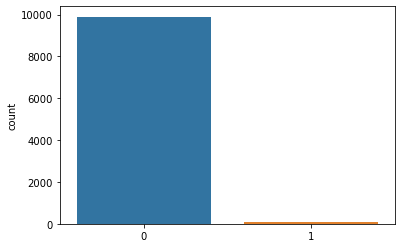

In [3]:
sns.countplot(x=y)

sampling_strategy  

- float :  리샘플링 후 다수 클래스 샘플 수에 대한 소수 클래스 샘플 수의 원하는 비율  
- `minority`: 소수 클래스 만 리샘플링

In [15]:
oversample = RandomOverSampler(sampling_strategy=0.5) 

X_over, y_over = oversample.fit_resample(X, y)
X_over.shape, y_over.shape, Counter(y_over)

((14850, 10), (14850,), Counter({0: 9900, 1: 4950}))

<AxesSubplot:ylabel='count'>

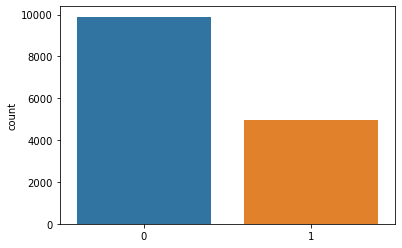

In [16]:
sns.countplot(x=y_over)

sampling_strategy 

- floa : 리샘플링 후 다수 클래스 샘플 수에 대한 소수 클래스 샘플 수의 원하는 비율  
- `majority`: 다수 클래스 만 리샘플링

In [17]:
undersample = RandomUnderSampler(sampling_strategy='majority') 

X_under, y_under = undersample.fit_resample(X, y)
X_under.shape, y_under.shape, Counter(y_under)

((200, 10), (200,), Counter({0: 100, 1: 100}))

<AxesSubplot:ylabel='count'>

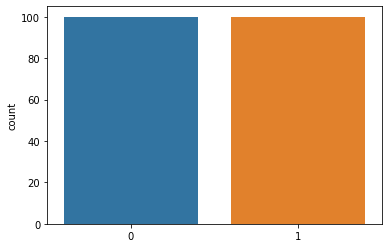

In [41]:
sns.countplot(x=y_under)

## Combining Random Oversampling and Undersampling

In [18]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_classes=2, weights=(0.99,), flip_y=0.0)
print(X.shape, y.shape, Counter(y))

# 소수 class 를 oversampling
over = RandomOverSampler(sampling_strategy=0.1)

X, y = over.fit_resample(X, y)
print(X.shape, y.shape, Counter(y))

# 다수 class 를 undersampling
under = RandomUnderSampler(sampling_strategy=0.5)

X, y = under.fit_resample(X, y)
print(X.shape, y.shape, Counter(y))

(10000, 10) (10000,) Counter({0: 9900, 1: 100})
(10890, 10) (10890,) Counter({0: 9900, 1: 990})
(2970, 10) (2970,) Counter({0: 1980, 1: 990})


<AxesSubplot:ylabel='count'>

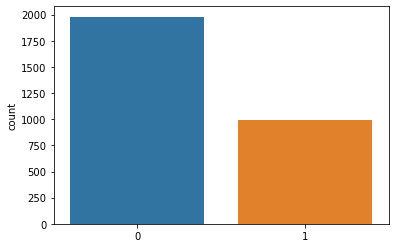

In [19]:
sns.countplot(x=y)